# Homework 5: Application of CLT

Total : 100 pts
This is an individual assignment.

There is only one part. **You can use python to solve some numerical calculations.** but make sure to show your steps.


In [2]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

## Description

Provide analytical solutions to the problems below and upload your answers as a PDF. (There is no need to type your answers -- just scan your handwritten solutions with an app like [CamScanner](https://www.camscanner.com/user/download) or [Scannable](https://apps.apple.com/us/app/evernote-scannable/id883338188).)

-  **Central limit Theorem is abbreviated as CLT.**

## Problem 1
(10 pt)
A population has a mean of  $\mu = 100$  and a standard deviation of  $\sigma = 15$. You take a random sample of size $ n = 60$.

- Compute the expected mean and standard deviation of the sample mean distribution.

## **Problem 1 Solution:**

(1) Expected Mean of Sample Mean Distribution:

$\mu_{\bar{x}} = \mu = 100$

(2) Standard Deviation (Standard Error) of Sample Mean Distribution:

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{15}{\sqrt{60}} \approx 1.9365$

## Problem 2:

(10pt, 5 pt each)
A university’s exam scores are normally distributed with a mean of 75 and a standard deviation of 12.

- What is the probability that a randomly selected student scores above 80?

- If we take a random sample of 50 students, what is the probability that their average score is above 80?

## **Problem 2 Solution:**

Given:
- Population mean: $\mu = 75$
- Population standard deviation: $\sigma = 12$



### (1) Probability a randomly selected student scores above 80:

Let $X$ be the exam score of a randomly selected student. We want:

$
P(X > 80) = 1 - P(X \leq 80)
$

Then, using Python, the calculated probability is approximately $0.3385$.

In [3]:
prob_above_80 = 1 - stats.norm.cdf(80, loc=75, scale=12)
print(prob_above_80)

0.3384611195106897


### (2) Probability the average score of 50 students is above 80:

By the Central Limit Theorem (CLT), the distribution of sample means will be normally distributed with:

- Mean: $\mu_{\bar{x}} = \mu = 75$

- Standard deviation : $ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{12}{\sqrt{50}} \approx 1.6971 $

We want the probability:

$ P(\bar{x} > 80) = 1 - P(\bar{x} \leq 80) $

Calculate using Python, and the probability is approximately $0.0016$.

In [4]:
prob_sample_mean_above_80 = 1 - stats.norm.cdf(80, loc=75, scale=12/np.sqrt(50))
print(prob_sample_mean_above_80)

0.0016081146550637193


## Problem 3:  
(10 pt. )
Suppose the population distribution is highly skewed (e.g., exponential distribution with mean  $\mu = 10$).

* According to the CLT, what happens to the shape of the  distribution of the sample mean $M_n$ as  $n$  increases? Simulate this scenario by taking multiple samples and computing the sample means.


## **Problem 3 Solution:**

To illustrate this, let's simulate using an exponential distribution (highly skewed):


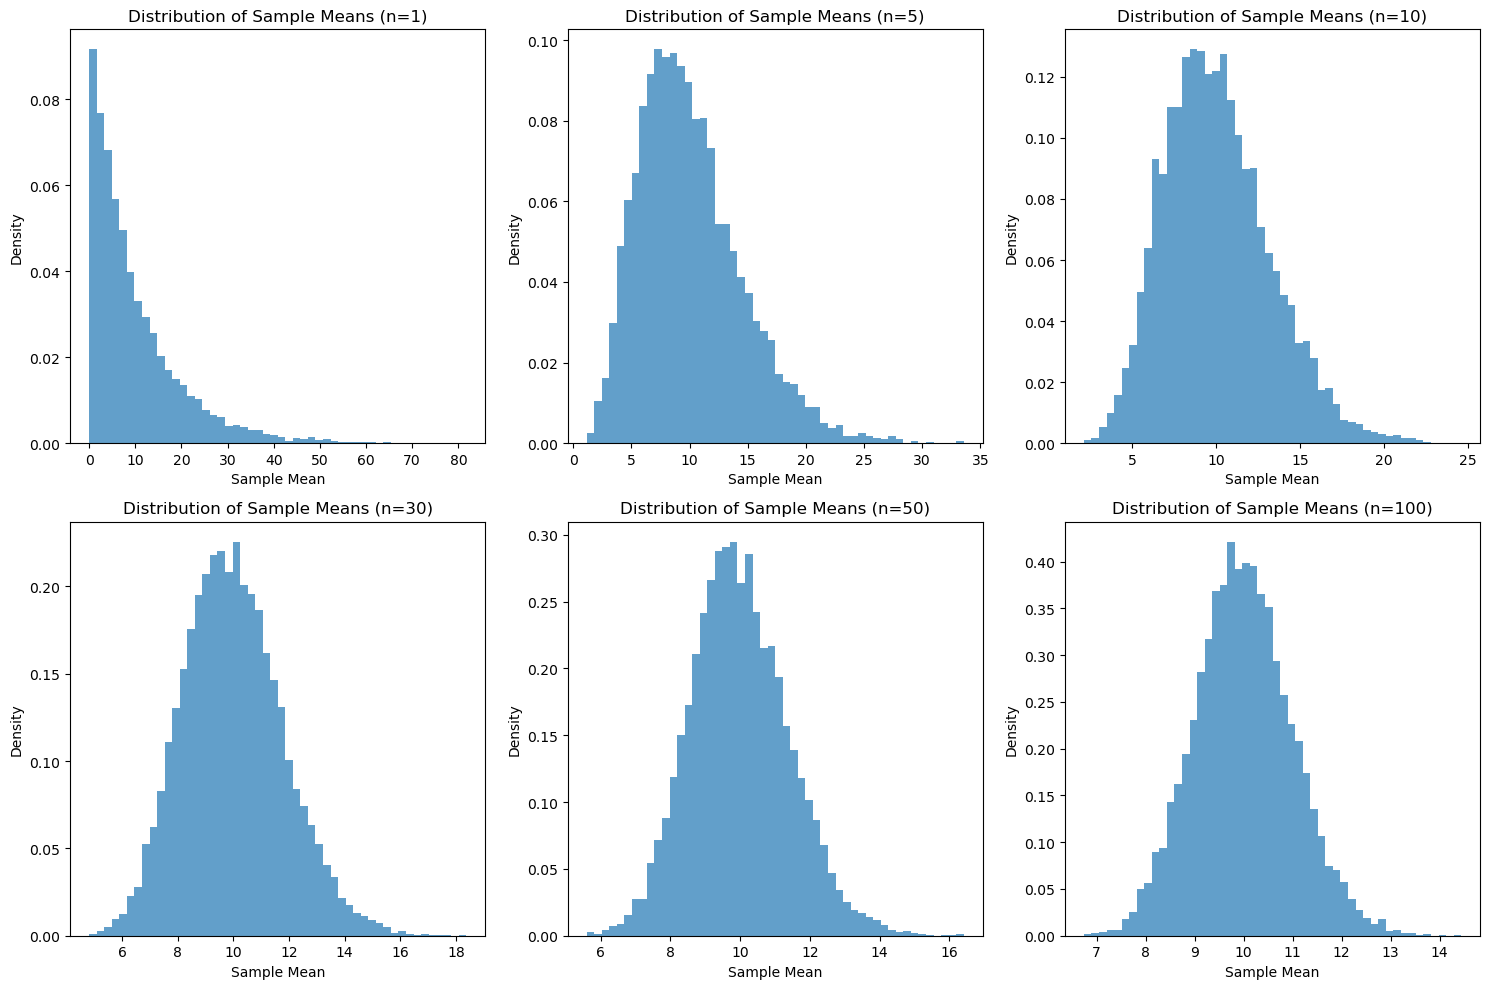

In [5]:
# Parameters
mu = 10  # mean of exponential distribution
sample_sizes = [1, 5, 10, 30, 50, 100]  # different sample sizes n
num_samples = 10000

# Plotting setup
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Generate and plot sample means for each sample size
for i, n in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.exponential(scale=mu, size=n)) for _ in range(num_samples)]
    axes = axes = plt.subplot(2, 3, sample_sizes.index(n) + 1)
    plt.hist(sample_means, bins=50, density=True, alpha=0.7)
    plt.title(f'Distribution of Sample Means (n={n})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


- For small $n$, the distribution of sample means closely resembles the skewed exponential distribution.
- As the sample size $n$ increases, the distribution becomes increasingly symmetric and bell-shaped, converging towards a normal distribution, as predicted by the CLT.
- As the sample size $n$ increase, the variance of $M_n$ is reduced monotonically.

## Problem 4:

(total 20 points, 5 point each)


Consider the following samples $x$ shown in the code block.


determine the unbiased estimates of

a) the true mean $\mu_X$;

b) the true variance $\sigma_X^2$;


c) Find the 90% and 95% confidence intervals of the true mean $\mu_X$.

d) Assume the variance is 4. Find the 90% and 95% confidence intervals of the true mean $\mu_X$.

In [6]:
x = np.array([ 5.13149548,  5.93772493,  9.06697128,  5.23739937, 10.97571492,
        6.57455483, 16.98124387,  6.43814608, 10.96175814, 12.99997309,
        6.35771001, 10.32057521, 14.2755244 , 14.67332882, 12.01342886,
        9.42476482,  5.83938407, 14.00531047,  5.5066388 , 16.9627389 ,
       11.2425588 ,  9.22283116,  8.81756564,  7.4542541 , 13.5276926 ,
        8.9838017 ,  6.17270784,  6.11628502, 12.73676266, 12.10245976,
        6.61158708, 11.63275555,  7.37901878, 10.89610414, 11.22716216,
       10.53632239,  6.28180412,  0.85423536,  7.25049042,  6.49677655,
       13.16411068, 19.76880339,  9.97978585,  8.54956202,  3.02158038,
       16.49559522,  5.35853099,  8.25208242, 11.12447038, 14.06371398])

## **Problem 4 Solution:**

In [7]:
# (a) Unbiased estimate of the true mean
mean_x = np.mean(x)
print(mean_x)

9.7001159498


In [8]:
# (b) Unbiased estimate of the true variance
var_x = np.var(x, ddof=1)
print(var_x)

15.307503304153016


In [9]:
# alternatively
var_x2 = x.var(ddof=1)
print(var_x2)

15.307503304153016


In [10]:
# (c) Confidence intervals with unknown variance using t-distribution
# We will skip this problem because it is not covered yet.
n = len(x)

# Sample Standard Error of the Mean (SSEM)
ssem_x = stats.sem(x) # calculate estimated_sigma / sqrt(n) using ddof=1

# Significance levels
alpha_90 = 1 - 0.9
alpha_95 = 1 - 0.95

# Critical t-values
t_val_90 = stats.t.ppf(1 - alpha_90/2, df=n-1)
t_val_95 = stats.t.ppf(1 - alpha_95/2, df=n-1)

# Margin of errors
moe_90 = t_val_90 * ssem_x
moe_95 = t_val_95 * ssem_x

# Confidence Intervals (CI)
CI_t_90 = (mean_x - moe_90, mean_x + moe_90)
CI_t_95 = (mean_x - moe_95, mean_x + moe_95)

print("Confidence Intervals with unknown variance:")
print("90% CI:", CI_t_90)
print("95% CI:", CI_t_95)

Confidence Intervals with unknown variance:
90% CI: (8.77246643921188, 10.62776546038812)
95% CI: (8.588201309001102, 10.8120305905989)


In [13]:
# (d) Confidence intervals with known variance (sigma^2 = 4, so sigma = 2) using z-distribution
sigma = 2
# Standard Error of the Mean (SEM) or the variance of the mean estimator.
sem = sigma / np.sqrt(n)

# Critical z-values
z_critical_90 = stats.norm.isf( alpha_90/2)
z_critical_95 = stats.norm.isf(alpha_95/2)

# Margin/distance d
d_z_90 = z_critical_90 * sem
d_z_95 = z_critical_95 * sem

# Confidence Intervals (CI)
CI_z_90 = (mean_x - d_z_90, mean_x + d_z_90)
CI_z_95 = (mean_x - d_z_95, mean_x + d_z_95)

print("\nConfidence Intervals with known variance:")
print("90% CI:", CI_z_90)
print("95% CI:", CI_z_95)


Confidence Intervals with known variance:
90% CI: (9.234881088329331, 10.16535081127067)
95% CI: (9.145754420060129, 10.254477479539872)


## Problem 5 - Biased Estimator

(Total 10 points. 5 points each)

Consider a set of i.i.d. data $X=\{X_i\}_{i=1}^N$, with mean $\mu$ and varaince $\sigma^2$. Define the following estimator for the mean:

\begin{align*}
\hat{\mu}_c &= \frac{1}{N} \sum_{i=1}^N (X_i + c), \qquad c \in \mathbb{R}
\end{align*}

1 (5 pt). Compute the bias of this estimator, $b_{\mu}(\hat{\mu}_c)$.

2 (5 pt). Compute $\operatorname{Var}[\hat{\mu}_c]$.


## **Problem 5 Solution:**

### (1) Bias of the Estimator

The bias is defined as:
$b_{\mu}(\hat{\mu}_c) = \mathbb{E}[\hat{\mu}_c] - \mu$

1. Compute the expectation of $\hat{\mu}_c$:
   
   $
   \mathbb{E}[\hat{\mu}_c] = \mathbb{E}\left[\frac{1}{N}\sum_{i=1}^N (X_i + c)\right]
   $
2. By linearity of expectation:
   
   $
   \mathbb{E}[\hat{\mu}_c] = \frac{1}{N} \sum_{i=1}^N \mathbb{E}[X_i + c] = \frac{1}{N} \sum_{i=1}^N \left(\mathbb{E}[X_i] + c\right)
   $
3. Since $\mathbb{E}[X_i] = \mu$ for all $i$:
   
   $
   \mathbb{E}[\hat{\mu}_c] = \frac{1}{N} \cdot N (\mu + c) = \mu + c
   $
4. Therefore, the bias is:
   
   $
   b_{\mu}(\hat{\mu}_c) = (\mu + c) - \mu = c
   $

### (2) Variance of the Estimator

To compute the variance:
$
\operatorname{Var}[\hat{\mu}_c]
$

1. Since the $X_i$'s are i.i.d., the variance of their sum is:
   
   $
   \operatorname{Var}[\hat{\mu}_c] = \operatorname{Var}\left[\frac{1}{N}\sum_{i=1}^N (X_i + c)\right] = \sum_{i=1}^N \operatorname{Var}\left[\frac{1}{N}(X_i + c)\right]
   $
3. Notice that adding a constant $c$ does not affect the variance, scaling a random variable by $\frac{1}{N}$ reduces the variance by a factor of $\frac{1}{N^2}$:

   $
   \operatorname{Var}\left[\frac{1}{N}(X_i + c)\right] = \frac{1}{N^2}\operatorname{Var}(X_i) = \frac{\sigma^2}{N^2}
   $
4. Finally, we get:
   
   $
   \operatorname{Var}[\hat{\mu}_c] = \operatorname{Var}\left[\frac{1}{N}\sum_{i=1}^N (X_i + c)\right] = N \cdot \frac{\sigma^2}{N^2} = \frac{\sigma^2}{N}.
   $


# Problem 6  - CI with known variance

(total 10 pt)
A random sample  $X_1,\ldots, X_{100}$
 is given from a distribution with known variance $Var(X_i)=16$. For the observed sample, the sample mean is $\bar X=23.5$,  Find an approximate 98%
 confidence interval for the mean of the underlying distribution $X_i$.

## **Problem 6 Solution:**

In [14]:
n = 100
sigma = np.sqrt(16)
mean_x = 23.5

# Standard Error of the Mean (SEM)
sem = sigma / np.sqrt(n)

# Significance levels
alpha_98 = 1 - 0.98

# Critical z-values
z_critical_98 = stats.norm.isf(alpha_98/2)

# Margin of errors
moe_z_98 = z_critical_98 * sem

# Confidence Intervals (CI)
CI_z_98 = (mean_x - moe_z_98, mean_x + moe_z_98)

print("\nConfidence Intervals with known variance:")
print("98% CI:", CI_z_98)


Confidence Intervals with known variance:
98% CI: (22.569460850383663, 24.430539149616337)


# Problem 7

(30pt,  )

**In this problem you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).**

**This data set contains 569 samples of digitized images of a fine needle aspirate (FNA) of a breast mass. Each sample describes the mass using 30 features, which include the average radius of the cell present in the FNA image.
Each sample is labeled as benign (class = 1) or malignant (class = 0).**

**We will use the ```scikit-learn``` library to load it and write it as a pandas dataframe:**

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y = False)
# print(data.DESCR) # uncomment this to learn more about this dataset

df = pd.DataFrame(data = np.hstack((data.target[:,np.newaxis], data.data)),
                      columns = np.concatenate((['Class'],data.feature_names)))
df

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**For each class (benign and malignant), consider the mean radius column. Answer the following questions:**

**Consider the mean radius feature (second column in dataframe) for both benign (class=1) and malignant (class=0) samples. Answer the following questions:**

1.(5pt)   **Plot overlapping histograms of the two types of samples (malignant and benign).**

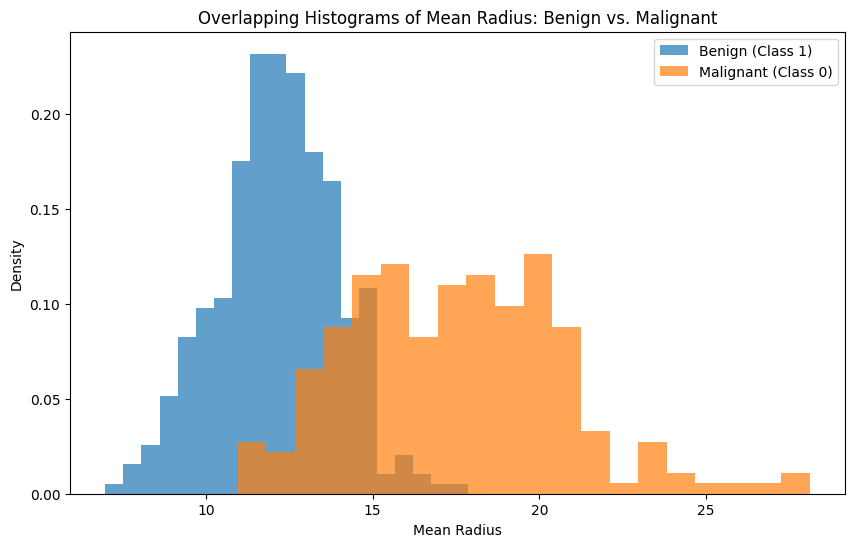

In [12]:
# Extract the mean radius column for benign and malignant samples.
benign = df[df['Class'] == 1]['mean radius']
malignant = df[df['Class'] == 0]['mean radius']

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(benign, bins=20, alpha=0.7, label='Benign (Class 1)', density=True)
plt.hist(malignant, bins=20, alpha=0.7, label='Malignant (Class 0)', density=True)
plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.title('Overlapping Histograms of Mean Radius: Benign vs. Malignant')
plt.legend()
plt.show()


2.(20pt)**Assume that the two groups follow a Gaussian distribution. Estimate the parameters of each distribution using unbiased estimators from the sample data.**

In [13]:
# Estimate parameters for the benign group
benign_mean = benign.mean()                        # Unbiased estimator of the mean
benign_variance = benign.var(ddof=1)                # Unbiased estimator of the variance

# Estimate parameters for the malignant group
malignant_mean = malignant.mean()                  # Unbiased estimator of the mean
malignant_variance = malignant.var(ddof=1)          # Unbiased estimator of the variance

print("Benign Samples (Class = 1):")
print("Estimated Mean:", benign_mean)
print("Estimated Variance:", benign_variance)
print("\nMalignant Samples (Class = 0):")
print("Estimated Mean:", malignant_mean)
print("Estimated Variance:", malignant_variance)

Benign Samples (Class = 1):
Estimated Mean: 12.146523809523808
Estimated Variance: 3.170221722043872

Malignant Samples (Class = 0):
Estimated Mean: 17.462830188679245
Estimated Variance: 10.265430814629346


3.(5pt) **Plot the resulting Gaussian distributions overlapping with the previous histogram plot and comment the results.**

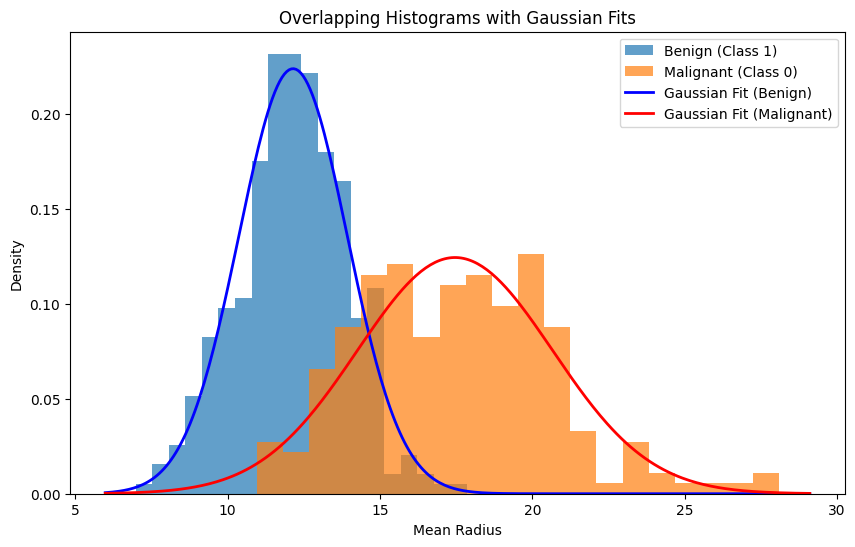

In [14]:
benign_std = np.sqrt(benign_variance)
malignant_std = np.sqrt(malignant_variance)

# Create a range of x values covering the data
x_values = np.linspace(min(df['mean radius']) - 1, max(df['mean radius']) + 1, 300)

# Calculate the PDFs for the benign and malignant groups
pdf_benign = stats.norm.pdf(x_values, loc=benign_mean, scale=benign_std)
pdf_malignant = stats.norm.pdf(x_values, loc=malignant_mean, scale=malignant_std)

# Plot overlapping histograms of the two groups
plt.figure(figsize=(10, 6))
plt.hist(benign, bins=20, alpha=0.7, density=True, label='Benign (Class 1)')
plt.hist(malignant, bins=20, alpha=0.7, density=True, label='Malignant (Class 0)')

# Overlay the Gaussian PDFs
plt.plot(x_values, pdf_benign, color='blue', lw=2, label='Gaussian Fit (Benign)')
plt.plot(x_values, pdf_malignant, color='red', lw=2, label='Gaussian Fit (Malignant)')

plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.title('Overlapping Histograms with Gaussian Fits')
plt.legend()
plt.show()